In [20]:
# Import Modules from the Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Seed of the Random Number Generator
np.random.seed(1001)

### Let's simulate 100 coin flips:

In [22]:
p = 0.5
N = 100

In [23]:
rv = np.random.rand(N) <= p

In [24]:
rv.dtype

dtype('bool')

In [25]:
rv = rv.astype("float")

In [26]:
result = rv.sum(axis=0)

In [27]:
result

46.0

### What happens, if we repeat this experiment 1000 times?

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   1.,   4.,   5.,
          9.,  21.,  24.,  29.,  48.,  62.,  86.,  81.,  92.,  89.,  90.,
        107.,  69.,  53.,  40.,  38.,  23.,  18.,   4.,   3.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  4

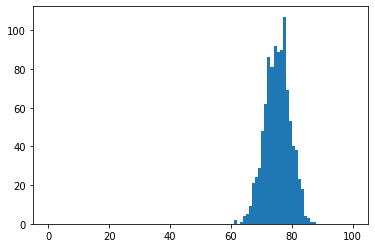

In [28]:
p = 0.75
N = 100
rv = np.random.rand(N,1000) <= p
result = rv.sum(axis=0)
plt.hist(result, bins=np.linspace(0,100,101))

### Can we do anything useful with this?

In [10]:
N = 100

In [11]:
x = np.random.rand(N)
y = np.random.rand(N)

In [12]:
x_line = np.linspace(0., 1., 100)
y_line = np.sqrt(1 - x_line*x_line)

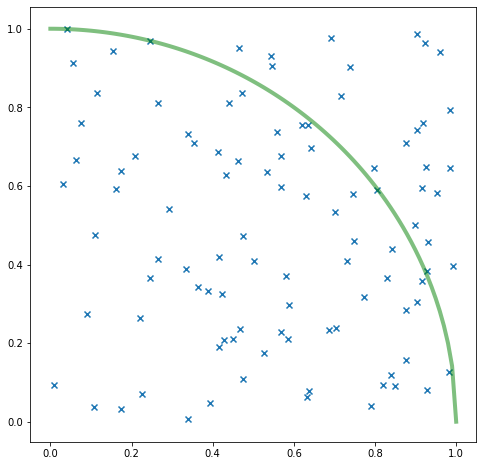

In [13]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x, y, marker="x")
ax.plot(x_line, y_line, "g", lw=4, alpha=0.5)

### From this sample we can estimate $\pi$

### $\frac{N_{Inside}}{N} \approx \frac{Area Circle}{Area Square} = \frac{\frac{1}{4} \pi r^2}{r^2} = \frac{\pi}{4}$

### $\Rightarrow \pi \approx 4 \cdot \frac{N_{Inside}}{N}$

In [14]:
z = x*x + y*y <= 1

In [15]:
pi_prediction = z.sum() / 100 * 4
pi_prediction

3.12

In [16]:
results_N = []
results_pi = []

N = 1
while N < 1_000_000:
    
    x = np.random.rand(N)
    y = np.random.rand(N)
    z = x*x + y*y <= 1
    pi_pred = z.sum() / N * 4
    #print(N, pi_pred, pi_pred - np.pi)
    
    results_N.append(N)
    results_pi.append(pi_pred)
    
    N = int(N*1.2 + 1)

Text(0, 0.5, 'absolute error')

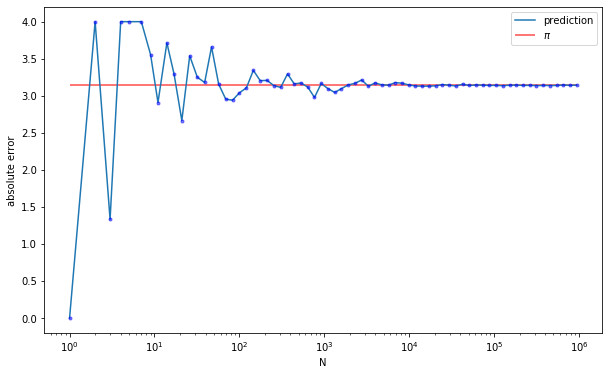

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(results_N, results_pi, label="prediction")
ax.plot(results_N, results_pi, ".", color="blue", alpha=0.5)
ax.semilogx()
ax.hlines([np.pi], xmin=results_N[0], xmax=results_N[-1], color="red", alpha=0.7, label="$\pi$")
ax.legend()
ax.set_xlabel("N")
ax.set_ylabel("absolute error")

Text(0, 0.5, 'absolute error')

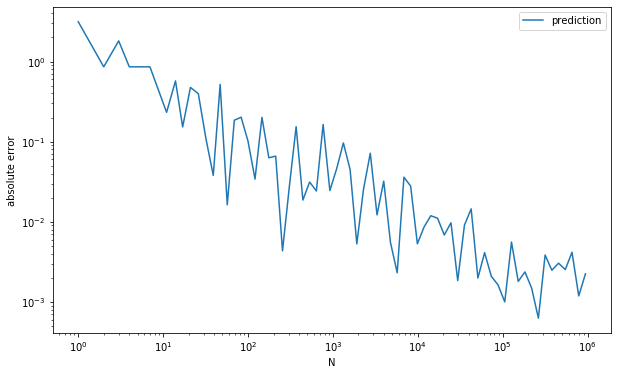

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(results_N, np.abs(np.asarray(results_pi) - np.pi), label="prediction")
ax.semilogx()
ax.semilogy()
ax.legend()
ax.set_xlabel("N")
ax.set_ylabel("absolute error")

Text(0, 0.5, 'absolute error')

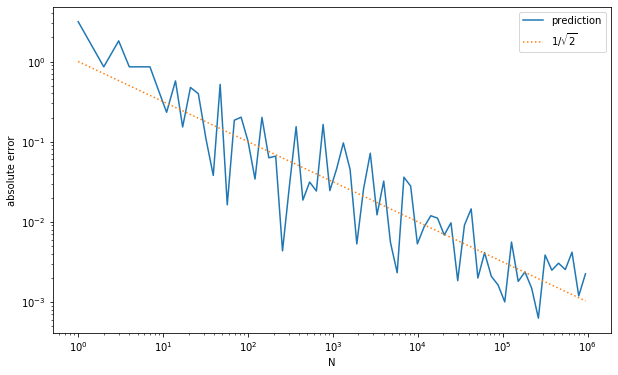

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(results_N, np.abs(np.asarray(results_pi) - np.pi), label="prediction")
ax.plot(np.asarray(results_N), 1./np.sqrt(np.asarray(results_N)), ':', label="$1/\sqrt{2}$")
ax.semilogx()
ax.semilogy()
ax.legend()
ax.set_xlabel("N")
ax.set_ylabel("absolute error")